In [60]:
import yfinance as yf
from datetime import datetime, timedelta

In [ ]:
ticker = "SPY"

t = yf.Ticker(ticker)

In [ ]:
start = datetime(2021, 1, 1)
end = datetime(2025, 6, 1)

factor = 3

In [62]:
df = yf.download(ticker, start, end)

/var/folders/zh/4snkqr657fb06hs2r74_4xpm0000gn/T/ipykernel_34605/99250952.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [24]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.096619,130.189080,123.514467,130.101388,143301900
2021-01-05,127.655609,128.366929,125.141666,125.589894,97664900
2021-01-06,123.358521,127.694587,123.144152,124.449847,155088000
2021-01-07,127.567924,128.259752,124.586275,125.073473,109578200
2021-01-08,128.668991,129.234143,126.895583,129.039251,105158200


In [ ]:
df["returns"] = df["Close"].pct_change()

In [26]:
df.head()

Price,Close,High,Low,Open,Volume,returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2021-01-04,126.096619,130.189080,123.514467,130.101388,143301900,NaN
2021-01-05,127.655609,128.366929,125.141666,125.589894,97664900,0.012363
2021-01-06,123.358521,127.694587,123.144152,124.449847,155088000,-0.033662
2021-01-07,127.567924,128.259752,124.586275,125.073473,109578200,0.034123
2021-01-08,128.668991,129.234143,126.895583,129.039251,105158200,0.008631


In [27]:
import numpy as np

In [ ]:
df["log_letf_factor"] = np.log(1 + df["returns"] * factor)

In [ ]:
df["log_ordinary_factor"] = np.log(1 + df["returns"])
df.drop(columns=["log_ordinary_factor"])

Price,Close,High,Low,Open,Volume,returns,log_letf_factor
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2021-01-04,126.096619,130.189080,123.514467,130.101388,143301900,NaN,NaN
2021-01-05,127.655609,128.366929,125.141666,125.589894,97664900,0.012363,0.036419
2021-01-06,123.358521,127.694587,123.144152,124.449847,155088000,-0.033662,-0.106455
2021-01-07,127.567924,128.259752,124.586275,125.073473,109578200,0.034123,0.097462
2021-01-08,128.668991,129.234143,126.895583,129.039251,105158200,0.008631,0.025564
...,...,...,...,...,...,...,...
2025-05-23,195.048645,197.475883,193.240699,193.450453,78432900,-0.030244,-0.095116
2025-05-27,199.983047,200.512445,197.206185,198.075209,56288500,0.025298,0.073153


In [29]:
df.head()

Price,Close,High,Low,Open,Volume,returns,log_letf_factor
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2021-01-04,126.096619,130.189080,123.514467,130.101388,143301900,NaN,NaN
2021-01-05,127.655609,128.366929,125.141666,125.589894,97664900,0.012363,0.036419
2021-01-06,123.358521,127.694587,123.144152,124.449847,155088000,-0.033662,-0.106455
2021-01-07,127.567924,128.259752,124.586275,125.073473,109578200,0.034123,0.097462
2021-01-08,128.668991,129.234143,126.895583,129.039251,105158200,0.008631,0.025564


In [ ]:
window_length = 10
window_start = datetime(2022, 3, 1)

# putting $100 into underlying

start_idx = df.index.get_loc(window_start)
end_idx = start_idx + window_length

# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df["Close"] / df["Close"].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))

In [67]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2021-01-04,126.096619,130.189080,123.514467,130.101388,143301900,NaN,NaN,NaN,NaN,NaN
2021-01-05,127.655609,128.366929,125.141666,125.589894,97664900,0.012363,0.036419,0.012288,NaN,NaN
2021-01-06,123.358521,127.694587,123.144152,124.449847,155088000,-0.033662,-0.106455,-0.034241,NaN,NaN
2021-01-07,127.567924,128.259752,124.586275,125.073473,109578200,0.034123,0.097462,0.033554,NaN,NaN
2021-01-08,128.668991,129.234143,126.895583,129.039251,105158200,0.008631,0.025564,0.008594,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,195.048645,197.475883,193.240699,193.450453,78432900,-0.030244,-0.095116,-0.030711,98.486913,94.012344
2025-05-27,199.983047,200.512445,197.206185,198.075209,56288500,0.025298,0.073153,0.024984,94.980793,85.037945


In [ ]:
df.dropna(inplace=True)

In [70]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2021-01-19,124.557030,125.414503,123.689818,124.508307,90757300,0.005427,0.016150,0.005412,98.779040,95.282084
2021-01-20,128.649506,129.097734,125.258612,125.365796,104319500,0.032856,0.094008,0.032328,100.778576,100.930371
2021-01-21,133.365570,136.093882,130.169553,130.374182,120150900,0.036658,0.104337,0.036002,108.112167,124.614301
2021-01-22,135.509262,136.269290,131.562955,132.790689,114459400,0.016074,0.047095,0.015946,106.225184,118.493226
2021-01-25,139.260651,141.375088,133.044000,139.406819,157611700,0.027684,0.079782,0.027307,108.231711,125.095028
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,195.048645,197.475883,193.240699,193.450453,78432900,-0.030244,-0.095116,-0.030711,98.486913,94.012344
2025-05-27,199.983047,200.512445,197.206185,198.075209,56288500,0.025298,0.073153,0.024984,94.980793,85.037945


In [ ]:
df["difference"] = df["leveraged_pct_change"] - df["ordinary_pct_return"]

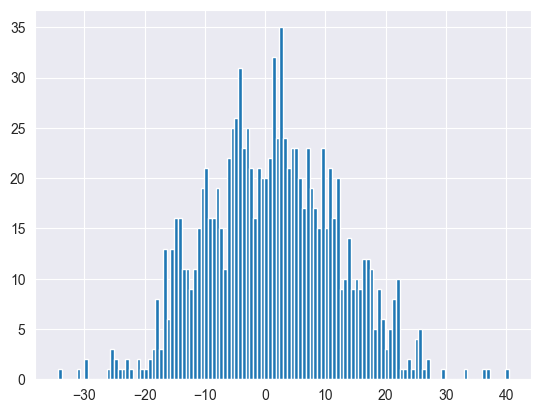

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure()
plt.hist(df["difference"], bins=120)
plt.show()

In [ ]:
df["difference"].quantile(0.95)

np.float64(19.01034401234276)

In [ ]:
np.exp(np.sum(df["log_letf_factor"].iloc[start_idx + 1 : end_idx + 1]))

np.float64(0.8438973806109844)

simulating movement GBM

In [84]:
import numpy as np

In [ ]:
def simulate_gbm(S0, mu, sigma, T, N, n_paths):
    # simulate n_paths many paths from 0 to T of GBM with parameters mu and sigma
    dt = T / N
    times = np.linspace(0, T, N + 1)

    Z = np.random.randn(n_paths, N)

    drift = mu - (1 / 2) * (sigma**2) * dt
    diffusion = sigma * dt * Z

    logS = np.zeros((n_paths, N + 1))
    logS[:, 0] = np.log(S0)
    logS[:, 1:] = np.cumsum(drift + diffusion, axis=1) + logS[:, :1]

    S = np.exp(logS)

    return S

In [ ]:
S = simulate_gbm(100, 0.01, 0.02, 10, 100, 100)

In [91]:
import pandas as pd

In [94]:
df = pd.DataFrame(S)

In [95]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100.0,101.052128,102.386540,103.139004,104.238023,105.509953,106.786142,107.779487,108.819349,110.158454,...,251.833865,253.976300,257.321826,260.606751,263.629457,266.392384,269.673751,272.864762,275.306776,278.094615
1,100.0,100.858489,101.132101,102.045504,102.907436,103.621098,104.607083,105.625565,106.649916,107.756408,...,245.392569,248.141576,250.822772,253.381943,255.758368,258.093229,261.053374,263.581516,265.768556,268.508739
2,100.0,100.992713,102.026484,102.785158,103.634835,104.292525,105.249626,106.194559,107.063963,108.145334,...,247.051620,248.885621,251.657043,254.016080,255.903678,257.050202,259.695458,262.108548,264.054603,266.445130
3,100.0,101.143112,102.108015,103.198889,104.512350,105.754023,106.938966,108.314967,110.056388,110.909679,...,253.593194,255.984416,258.773483,261.669526,265.077718,267.520239,270.560734,273.852523,276.433237,278.598668
4,100.0,100.896286,101.710327,102.870181,104.138940,105.316189,106.385094,107.238334,108.483546,109.567969,...,247.233915,250.122543,252.959112,255.955442,259.299161,262.291394,264.939962,267.587108,270.252748,273.979610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,100.652266,101.933683,102.622038,103.643274,104.436878,105.610575,106.618959,107.807492,108.868620,...,243.523815,245.688159,248.865599,251.500632,253.708078,255.583192,258.036925,260.088024,262.714916,265.873591
96,100.0,100.946334,102.097771,103.004145,104.129580,104.924591,105.935196,106.943808,107.759856,108.935826,...,248.072286,250.420763,253.632329,256.095758,258.688588,261.757160,264.674883,268.025049,271.009716,273.446947
97,100.0,100.848458,102.053123,103.287198,104.121371,104.921469,105.886702,106.422733,107.418708,108.242266,...,239.365790,241.560379,243.936924,247.147535,249.527658,252.028929,255.159988,257.690935,259.929316,262.663815
98,100.0,100.609905,101.835549,102.954638,104.425177,105.375419,106.334674,107.068857,108.103225,109.285553,...,240.662711,242.773521,245.577816,248.414915,250.876810,253.596586,256.428868,258.375445,260.940818,263.786450


now do the below but with the above S

In [ ]:
# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df["Close"] / df["Close"].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))